# Building a Square Wave from DTFS Coefficients

## 1.1 DTFS Basics
The DTFS representation of a periodic signal $x[n]$ with fundamential period $N$ and fundamental frequency $\Omega_0 = 2\pi/N$ is given by:

$$ x[n] = \sum_{k=0}^{N-1}{X[k] e^{jk\Omega_0n}} , $$
where 
$$ X[k] = \frac{1}{N} \sum_{n=0}^{N-1}{x[n] e^{-jk\Omega_0n}} . $$

The idea is that as we continue to add the next weighted $k^{th}$ harmonic complex exponential up to $k=N-1$, we will get a signal that looks closer to the periodic signal we wish to obtain.

## 1.2 Square Wave Function
An easier way to visualize this is to consider a square wave with an even period $N$ that is defined within one period by:

$$ x[n] = \left\{
\begin{array}{ll}
      1, & -M\leq n\leq M \\
      0, & M<n<N-M \\
\end{array} 
\right. ,$$

where $M$ is some positive integer less than $N$. The square wave is illustrated below:
![title](https://drive.google.com/uc?export=view&id=1Io5teWL1jA0Ua09e092AdX-pbc3R1M9E)

## 1.3 Defining the Square Wave in Terms of Sinusoids

We can exploit the symmetry of the square wave defined above to express the function in terms of its harmonic cosines instead of harmonic exponentials:

$$ x[n] =\sum_{k=0}^{N/2}{B[k] \cos{(k\Omega_0 n)}} , $$
where
$$ B[k] = \left\{
\begin{array}{ll}
      X[k], & k=0,N/2 \\
      2X[k], & k=1,2,...,N/2-1 \\
\end{array} 
\right. .$$

Note that this equation is especially derived for DT square waves with an even-valued period that is "on" at $-M\leq n\leq M$.

In this form, we can think of the modified DTFS representation of the square wave as a superposition of ***sinusoids***. That is, as we add the next weighted $k^{th}$ harmonic ***cosine*** up to $k=N/2$, we will obtain a periodic signal that becomes more similar to a square wave with each increasing $k$.

## 1.4 Partial Sum Approximation
**<font color='blue'>(Example 3.7 from Signals and Systems, 2nd. ed., Haykin & Van Veen)</font>**

Let us now visualize the superposition of sinusoids at work. For some positive integer $J\leq N/2$, define the $J^{th}$ order square wave approximator as:

$$ \hat{x}_J[n] =\sum_{k=0}^{J}{B[k] \cos{(k\Omega_0 n)}} . $$

For this example, suppose the square wave has fundamental period $N = 50$ with $M = 12$. Let $J = 1$.  

### 1.4.1 Importing modules

Since we are working with Python, we should take advantage of ***NumPy***, a package that can handle arrays efficiently. We will also be using ***Matplotlib***, which can handle stem plots for our DT plotting purposes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.4.2 Matrix form for the DTFS Coefficients

In order to find $B[k]$, we first need to find $X[k]$. For computational efficiency, we can succinctly express the DTFS coefficients equation $X[k] = \frac{1}{N} \sum_{n=0}^{N-1}{x[n] e^{-jk\Omega_0n}}$ as

$$ X_k = Wx_n ,$$

where $x_n$ and $X_k$ are length-$N$ vectors and $W$ is a $N\times N$ matrix of exponentials such that

$$x_n = (x[0], x[1], ..., x[N-1])^T ,$$

$$X_k = (X[0], X[1], ..., X[N-1])^T, $$ 

$$ W = \frac{1}{N} \cdot 
  \left[ {\begin{array}{66}
   1 & 1 & 1 & 1 & \cdots & 1 \\
   1 & w & w^2 & w^3 & \cdots & w^{N-1} \\
   1 & w^2 & w^4 & w^6 & \cdots & w^{2(N-1)} \\
   1 & w^3 & w^6 & w^9 & \cdots & w^{3(N-1)} \\
   \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & w^{N-1} & w^{2(N-1)} & w^{3(N-1)} & \cdots & w^{(N-1)(N-1)}
  \end{array} } \right] \text{, for } w = e^{-j\Omega_0}.$$
  
Each row of $W$ represents a value for $k$, and each column represents a value for $n$.

In [2]:
# Initialize parameters
N = 50
M = 12
J = 1

# Define fundamental freq
omega = 2*np.pi/N

# Set up exponential matrix W
kn = np.array(range(N), ndmin=2).T @ np.array(range(N), ndmin=2) # k rows, n columns
W = np.exp(-1j*omega*kn)
W /= N

# Set x[n]=1 from n=0 to n=M and n=N-M to n=N-1
xn = np.zeros(N)
xn[:M+1] = 1
xn[N-M:] = 1

# Multiply W*xn = Xk
Xk = W @ xn

### 1.4.3 Obtaining modified DTFS coefficients

Now that we have values for $X_k$, we can find $B[k]$ by extracting values from $X_k$ for $0\leq k\leq J$ and doubling the values at $1\leq k\leq J$, provided that $J<N/2$. 

In [3]:
# Define new set of coefficients B[k] = 2*X[k] for k!=0,N/2 and for up to k=J
Bk = np.copy(Xk[:J+1])
if J < N/2:
    Bk[1:] *= 2 # include Jth term for doubling
else:
    Bk[1:J] *= 2 # exclude

### 1.4.4 Constructing the cosine matrix

Similar to how we constructed the matrix of exponentials $W$, we can construct a matrix of cosines $C$. The $J^{th}$ order square wave approximator can be expressed in matrix form as

$$ \hat{x}_J = CB_k ,$$

where $B_k$ is a length-$(J+1)$ vector, $\hat{x}_J$ is a length-$N$ vector, and $C$ is a $N\times (J+1)$ matrix of cosines such that

$$B_k = (B[0], B[1], ..., B[J])^T, $$

$$\hat{x}_J = (x[-N/2+1], ..., x[-1], x[0], x[1], ..., x[N/2])^T ,$$ 

$$ C = \{\cos(k\Omega_0 n)\ |\ -N/2+1\leq n\leq N/2 \ , 0\leq k\leq J\}.$$

In [4]:
# Set up a cosine matrix C
nvals = range(int(-N/2+1), int(N/2+1))
kvals = range(J+1)
nk = np.array(nvals, ndmin=2).T @ np.array(kvals, ndmin=2) # n=N rows, k=J+1 columns
C = np.cos(omega*nk)

# Multiply C*Bk = xj
xj = C @ Bk

### 1.4.5 Plotting the $J^{th}$ order approximation

Now we can plot our first-order square wave approximation alongside the $J^{th} cosine term added, using the values we obtained from the previous section. Note that only real parts of our solutions are plotted.

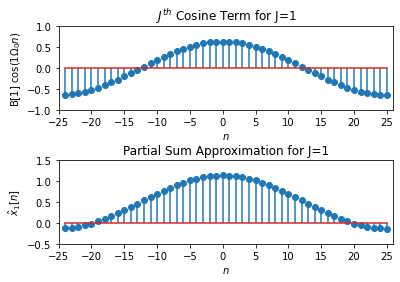

In [5]:
# Set up subplots
fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=0.6)

# Plot Jth cosine term (real part)
B = Bk[J]*np.cos(J*omega*np.array(nvals))
axs[0].stem(nvals, np.real(B))
axs[0].set_xticks(np.arange(-N/2, N/2+1, step=5))
axs[0].set_xlim([-N/2, N/2+1])
axs[0].set_yticks(0.5*np.arange(-2, 3))
axs[0].set(xlabel=r'$\it{}$'.format('n'), ylabel=r'B[{}] cos({}$\Omega_0\it{}$)'.format(J,J,'n'))
axs[0].set_title('$J^{}$ Cosine Term for J={}'.format('{th}',J))

# Plot partial sum approximation (real part)
axs[1].stem(nvals, np.real(xj))
axs[1].set_xticks(np.arange(-N/2, N/2+1, step=5))
axs[1].set_xlim([-N/2, N/2+1])
axs[1].set_yticks(0.5*np.arange(-1, 4))
axs[1].set(xlabel=r'$\it{}$'.format('n'), ylabel=r'$\hat{}_{}[\it{}]$'.format('x',{J},'n'))
axs[1].set_title('Partial Sum Approximation for J={}'.format(J))

plt.show()

## 1.5 User-Defined Approximation Function

To make things easier, we can compile all of the code blocks above and create a user-defined function called **square_wave**. This will make comparisons easier. Additionally, evaluating at odd values of $J$ is more interesting since $\cos(J\Omega_0 n) = 0$ when $J$ is even.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def square_wave(N, M, J):
    """
    INPUTS:
    N (int): period of the square wave (even)
    M (int): square wave is 'on' from -M to +M (i.e., 2M+1 points)
    J (int): for J <= N/2, number of harmonic cosines to be used for partial sum approximation
    
    OUTPUT:
    nvals (range): int values of n within one period from -N/2+1 to N/2
    xj (numpy.ndarray): complex array listing x_j[n] for one period with respect to nvals
    """
    
    # Check for input errors
    err = 0
    if ((N % 2) == 1 or N <= 0) or isinstance(N, int) == False:
        print("Error! N must be an even, positive integer.")
        err = 1
    elif (J > N/2 or J <= 0) or isinstance(J, int) == False:
        print("Error! J must be a positive integer less than or equal to half the period.")
        err = 1
    elif (M >= N or M <= 0) or isinstance(M, int) == False:
        print("Error! M must be a positive integer less than the period.")
        err = 1
    if err == 1:    
        return _,_
    
    # Define fundamental freq
    omega = 2*np.pi/N
    
    # Set up exponential matrix W
    kn = np.array(range(N), ndmin=2).T @ np.array(range(N), ndmin=2) # k=N rows, n=N columns
    W = np.exp(-1j*omega*kn)
    W /= N
    
    # Set x[n]=1 from n=0 to n=M and n=N-M to n=N-1
    xn = np.zeros(N)
    xn[:M+1] = 1
    xn[N-M:] = 1
    
    # Multiply W*xn = Xk
    Xk = W @ xn
    
    # Define new set of coefficients B[k] = 2*X[k] for k!=0,N/2 and for up to k=J
    Bk = np.copy(Xk[:J+1])
    if J < N/2:
        Bk[1:] *= 2 # include Jth term for doubling
    else:
        Bk[1:J] *= 2 # exclude
    
    # Set up a cosine matrix C
    nvals = range(int(-N/2+1), int(N/2+1))
    kvals = range(J+1)
    nk = np.array(nvals, ndmin=2).T @ np.array(kvals, ndmin=2) # n=N rows, k=J+1 columns
    C = np.cos(omega*nk)
    
    # Multiply C*Bk = xj
    xj = C @ Bk
    
    # Set up subplots
    fig, axs = plt.subplots(2)
    fig.subplots_adjust(hspace=0.6)
    
    # Plot Jth cosine term (real part)
    B = Bk[J]*np.cos(J*omega*np.array(nvals))
    axs[0].stem(nvals, np.real(B))
    axs[0].set_xticks(np.arange(-N/2, N/2+1, step=5))
    axs[0].set_xlim([-N/2, N/2+1])
    axs[0].set_yticks(0.5*np.arange(-2, 3))
    axs[0].set(xlabel=r'$\it{}$'.format('n'), ylabel=r'B[{}] cos({}$\Omega_0\it{}$)'.format(J,J,'n'))
    axs[0].set_title('$J^{}$ Cosine Term for J={}'.format('{th}',J))
    
    # Plot partial sum approximation (real part)
    axs[1].stem(nvals, np.real(xj))
    axs[1].set_xticks(np.arange(-N/2, N/2+1, step=5))
    axs[1].set_xlim([-N/2, N/2+1])
    axs[1].set_yticks(0.5*np.arange(-1, 4))
    axs[1].set(xlabel=r'$\it{}$'.format('n'), ylabel=r'$\hat{}_{}[\it{}]$'.format('x',{J},'n'))
    axs[1].set_title('Partial Sum Approximation for J={}'.format(J))
    
    plt.show()
    
    return nvals, xj

### 1.5.1 First-order approximator

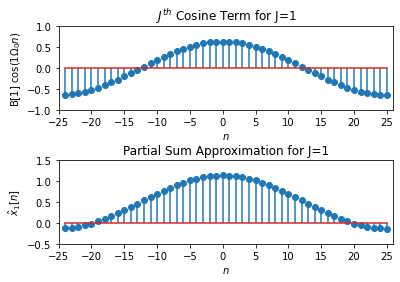

In [8]:
N = 50
M = 12
J = 1
_,_ = square_wave(N, M, J)

### 1.5.2 Third-order approximator

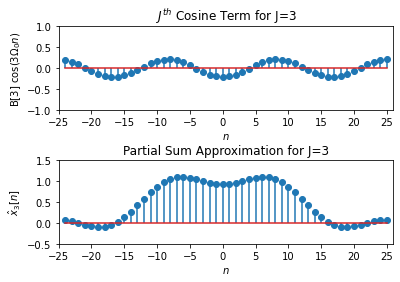

In [9]:
J = 3
_,_ = square_wave(N, M, J)

### 1.5.3 Fifth-order approximator

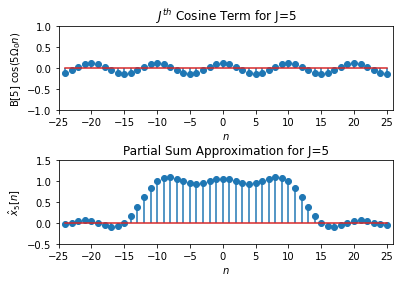

In [10]:
J = 5
_,_ = square_wave(N, M, J)

### 1.5.4 Order-23 approximator

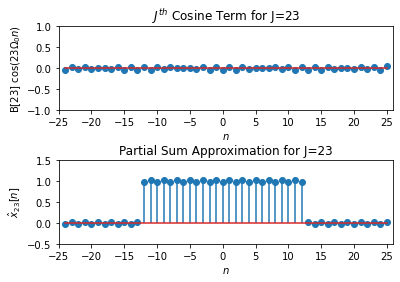

In [11]:
J = 23
_,_ = square_wave(N, M, J)

### 1.5.5 Order-25 approximator

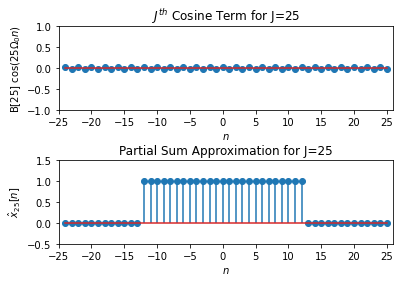

In [12]:
J = 25
_,_ = square_wave(N, M, J)

Notice that as we increase $J$, the approximation becomes closer to a square wave. That is, with each weighted sinusoid added, the signal becomes more and more like a square wave.

## 1.6 Exploration

Feel free to experiment with different positive values of $N$, $M$, and $J$. Make sure that $N$ is even, $M<N$, and $J\leq N/2$.

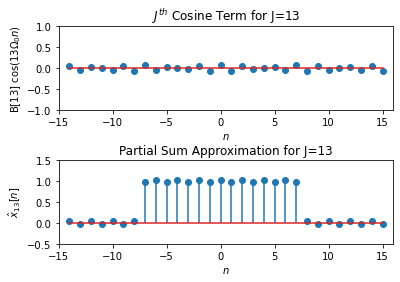

In [15]:
N = 30
M = 7
J = 13
_,_ = square_wave(N, M, J)